<a href="https://colab.research.google.com/github/gopichandchalla16/infosys-internship-real-time-industry-insight-system/blob/anshika-dev/Infosys_Industry_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 1 — Data Sourcing & Handling
# Project:
## Real-Time Industry Insight & Strategic Intelligence System
Goal of this notebook :
1. Collect company-related data from open internet sources
(Wikipedia, Google News RSS, Yahoo Finance).
2. Clean and structure the data into pandas DataFrames.
3. Run a simple sentiment analysis on textual data (simulated tweets + news headlines).
4. Visualize insights (bar chart + sentiment trend line).

## **1. Setup (install packages and imports)**

In [38]:
# Run this cell first in Colab
!pip install yfinance wikipedia feedparser textblob
# textblob may require NLTK corpora, download if needed (TextBlob auto-downloads some resources)
import pandas as pd
import numpy as np
import yfinance as yf
import wikipedia
import feedparser
from textblob import TextBlob
import matplotlib.pyplot as plt
from datetime import datetime
# Matplotlib nicer defaults for presentation
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['axes.grid'] = True

## **2. Data collection**

We will collect data from three public sources: -

Wikipedia: company summary and some sections

Google News RSS: recent headlines about the company

Yahoo Finance via yfinance : recent stock price history

## **2.1 Wikipedia company summary**

In [39]:
asset_name="Infosys"
try:
   # Attempt to fetch summary by appending ' company' to the asset name
   try:
     wiki_summary = wikipedia.summary(f"{asset_name} company", sentences=5)
     print(" Wikipedia Summary:\n")
     print(wiki_summary)
   except wikipedia.exceptions.PageError:
      # If appending ' company' doesn't work, try the original asset name
      wiki_summary = wikipedia.summary(asset_name, sentences=5)
      print(" Wikipedia Summary:\n")
      print(wiki_summary)
except Exception as e:
  print(f"Could not fetch Wikipedia summary: {e}")

 Wikipedia Summary:

Infosys Limited is an Indian multinational technology company that offers information technology, business consulting, and outsourcing services. Founded in 1981 by seven engineers, the company is headquartered in Bengaluru and considered one of the Big Six Indian IT companies.
Infosys has also attracted controversies due to allegations of visa and tax fraud in the United States and for creating malfunctioning government websites.


== History ==
Infosys was founded by N. R. Narayana Murthy, Nandan Nilekani, Kris Gopalakrishnan, S. D. Shibulal, K. Dinesh, N. S. Raghavan, and Ashok Arora, with an initial capital of $250. It was incorporated as Infosys Consultants Private Limited in Pune on 2 July 1981, before relocating to Bangalore in 1983.


## **2.2 Google News RSS headlines**

We'll use Google News RSS search for Infosys and parse top items.

In [40]:
query = 'Infosys'
rss_url = f'https://news.google.com/rss/search?q={query}'
feed = feedparser.parse(rss_url)
news_items = []
for entry in feed.entries[:30]: # get up to 30 headlines
  news_items.append({
    'title': entry.title,
    'published': entry.get('published',''),
    'link': entry.get('link','')
  })
news_df = pd.DataFrame(news_items)
news_df['published'] = pd.to_datetime(news_df['published'], errors='coerce')
news_df.head()

,title,published,link
0,"Infosys buyback: Narayana Murthy, wife Sudha M...",2025-10-22 11:45:26,https://news.google.com/rss/articles/CBMihgJBV...
1,"Infosys promoters, including Nilekani and Sudh...",2025-10-22 15:39:54,https://news.google.com/rss/articles/CBMi2gFBV...
2,Infosys' promoters not to participate in Rs 18...,2025-10-23 07:30:31,https://news.google.com/rss/articles/CBMihgJBV...
3,"Infosys promoters opt out of Rs 18,000-crore b...",2025-10-23 00:24:00,https://news.google.com/rss/articles/CBMi0wFBV...
4,India's benchmarks target record as shareholde...,2025-10-23 04:43:00,https://news.google.com/rss/articles/CBMi3gFBV...


## **2.3 Yahoo Finance historical data**

We will download the recent 6 months of daily stock prices for Infosys. On Yahoo Finance, Infosys India
listing uses ticker INFY.NS.

In [41]:
ticker = 'INFY.NS' # Infosys on Yahoo (India exchange)
stock = yf.Ticker(ticker)
hist = stock.history(period='6mo', interval='1d')
hist = hist.reset_index()
hist = hist[['Date','Open','High','Low','Close','Volume']]
hist.tail()

,Date,Open,High,Low,Close,Volume
122,2025-10-17 00:00:00+05:30,1454.900024,1458.400024,1434.0,1441.099976,16959378
123,2025-10-20 00:00:00+05:30,1453.699951,1467.000000,1450.0,1460.900024,6994246
124,2025-10-21 00:00:00+05:30,1478.000000,1486.000000,1470.0,1472.400024,1698704
125,2025-10-23 00:00:00+05:30,1510.000000,1546.000000,1506.0,1528.500000,20358624
126,2025-10-24 00:00:00+05:30,1539.500000,1543.000000,1518.0,1525.400024,8648872


## **2.4 Simulated tweets (for sentiment demo)**

We'll create a small set of synthetic tweets that reflect a mixture of positive, negative, and neutral
opinions about Infosys. In a production system we'd replace this with real tweets collected through
Twitter API or other social scraping (following the platform's terms of service).

In [42]:
simulated_tweets = [
  "Infosys reports strong quarterly results, growth beats estimates. Proud of the team!",
  "Concerned about the slowdown in digital orders — revenues may be under pressure.",
  "Amazing client wins announced today by Infosys. Great execution!",
  "CEO commentary is vague; investors are disappointed.",
  "Infosys stock is showing steady recovery after recent dip.",
  "Layoffs rumors spreading — morale may be affected.",
  "New sustainability initiative by Infosys is commendable.",
  "Not impressed with the latest earnings call — guidance is weak.",
  "Partnership with XYZ could open large opportunities.",
  "Mixed signals from the boardroom, watch carefully."
]
tweets_df = pd.DataFrame({'text': simulated_tweets})
tweets_df.head()

,text
0,"Infosys reports strong quarterly results, grow..."
1,Concerned about the slowdown in digital orders...
2,Amazing client wins announced today by Infosys...
3,CEO commentary is vague; investors are disappo...
4,Infosys stock is showing steady recovery after...


## **3. Preprocessing & Cleaning**

We'll ensure text is cleaned (lowercase, trimmed) and remove obvious duplicates or empty items. For
news titles and simulated tweets we compute a simple sentiment score (polarity) using TextBlob.

In [43]:
# Basic cleaning helper
import re
def clean_text(s):
  if not isinstance(s, str):
    return ''
  s = s.strip()
  s = re.sub(r'\s+', ' ', s)
  return s
# Clean news titles
news_df['title_clean'] = news_df['title'].apply(clean_text)
news_df = news_df[news_df['title_clean'] !=''].drop_duplicates(subset=['title_clean']).reset_index(drop=True)
# Clean tweets
tweets_df['text_clean'] = tweets_df['text'].apply(clean_text)
# Show counts
print(f"News headlines collected: {len(news_df)}")
print(f"Simulated tweets: {len(tweets_df)}")

News headlines collected: 30
Simulated tweets: 10


## **3.1 Sentiment scoring with TextBlob**

TextBlob returns a polarity score between -1 (negative) and +1 (positive). We'll compute polarity for each
text item and use it as our sentiment metric.

In [44]:
def sentiment_polarity(text):
  try:
    return TextBlob(text).sentiment.polarity
  except Exception:
    return np.nan
# News sentiment
news_df['sentiment'] = news_df['title_clean'].apply(sentiment_polarity)
# Tweets sentiment
tweets_df['sentiment'] = tweets_df['text_clean'].apply(sentiment_polarity)
# Quick view
print('--- News sentiment sample ---')
print(news_df[['title_clean','sentiment']].head())
print('\n--- Tweets sentiment sample ---')
print(tweets_df[['text_clean','sentiment']])

--- News sentiment sample ---
                                         title_clean  sentiment
0  Infosys buyback: Narayana Murthy, wife Sudha M...     -0.125
1  Infosys promoters, including Nilekani and Sudh...      0.000
2  Infosys' promoters not to participate in Rs 18...      0.700
3  Infosys promoters opt out of Rs 18,000-crore b...      0.000
4  India's benchmarks target record as shareholde...      0.000

--- Tweets sentiment sample ---
                                          text_clean  sentiment
0  Infosys reports strong quarterly results, grow...   0.716667
1  Concerned about the slowdown in digital orders...   0.000000
2  Amazing client wins announced today by Infosys...   0.633333
3  CEO commentary is vague; investors are disappo...  -0.625000
4  Infosys stock is showing steady recovery after...   0.083333
5  Layoffs rumors spreading — morale may be affec...   0.000000
6  New sustainability initiative by Infosys is co...   0.136364
7  Not impressed with the latest earnings

## **4. Combine sources into a single dataframe for analysis**

We'll create a unified content_df with columns: `source` , `text` , `published`, `sentiment` .

In [45]:
# Prepare news entries
news_for_analysis = news_df[['title_clean','published','sentiment']].copy()
news_for_analysis.columns = ['text','published','sentiment']
news_for_analysis['source'] = 'news'
# Prepare tweets entries (no published timestamps, create incremental times)
tweets_for_analysis = tweets_df[['text_clean','sentiment']].copy()
tweets_for_analysis.columns = ['text','sentiment']
# create synthetic timestamps for tweets (latest = now)
now = datetime.now()
minutes = np.arange(len(tweets_for_analysis))[::-1]*60
# spread them by 1 hour
tweets_for_analysis['published'] = [now - pd.Timedelta(minutes=int(m)) for m in minutes]
tweets_for_analysis['source'] = 'simulated_tweet'
# Combine
content_df = pd.concat([news_for_analysis,
tweets_for_analysis[['text','published','sentiment','source']]],
ignore_index=True)
content_df = content_df.sort_values('published').reset_index(drop=True)
content_df.head(10)

,text,published,sentiment,source
0,Infosys kicks off employee performance review ...,2025-10-13 07:00:00,0.200000,news
1,India's Infosys wins $1.6 billion deal from UK...,2025-10-14 07:00:00,0.300000,news
2,Old Video Of Bengaluru's Infosys Canteen Goes ...,2025-10-19 16:13:10,0.450000,news
3,Infosys’ early employee who retired at 38 in 2...,2025-10-19 17:17:21,0.200000,news
4,As Infosys canteen video from 90s trends onlin...,2025-10-20 03:35:07,0.200000,news
5,Not just work hours. Ex-Infosys employee remem...,2025-10-20 04:37:21,0.250000,news
6,Infosys Reports Strong Q2 2025 Results and Str...,2025-10-21 14:22:49,0.433333,news
7,"Infosys buyback: Narayana Murthy, wife Sudha M...",2025-10-22 11:45:26,-0.125000,news
8,"Infosys promoters, including Nilekani and Sudh...",2025-10-22 15:39:54,0.000000,news
9,International Paper announces IT layoffs follo...,2025-10-22 17:59:00,0.045455,news


## **5. Exploratory analysis & Visualizations**

## **5.1 Basic statistics**

In [46]:
print('Overall sentiment stats:')
print(content_df['sentiment'].describe())
# Average sentiment per source
avg_sentiment = content_df.groupby('source')['sentiment'].mean().reset_index()
avg_sentiment

Overall sentiment stats:
count    40.000000
mean      0.082478
std       0.253815
min      -0.625000
25%       0.000000
50%       0.000000
75%       0.152273
max       0.716667
Name: sentiment, dtype: float64


,source,sentiment
0,news,0.080743
1,simulated_tweet,0.087684


## **5.2 Visualization 1 — Bar chart: Average sentiment by source**

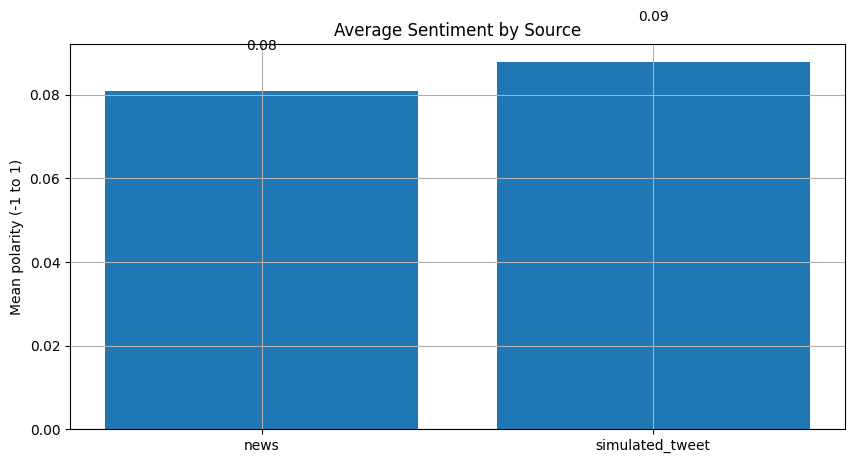

In [47]:
fig, ax = plt.subplots()
ax.bar(avg_sentiment['source'], avg_sentiment['sentiment'])
ax.set_title('Average Sentiment by Source')
ax.set_ylabel('Mean polarity (-1 to 1)')
for i, v in enumerate(avg_sentiment['sentiment']):
  ax.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

## **5.3 Visualization 2 — Line chart: Sentiment trend over time (combined)**

Plot sentiment points over time to see trends. We'll use a rolling average to smooth the line.

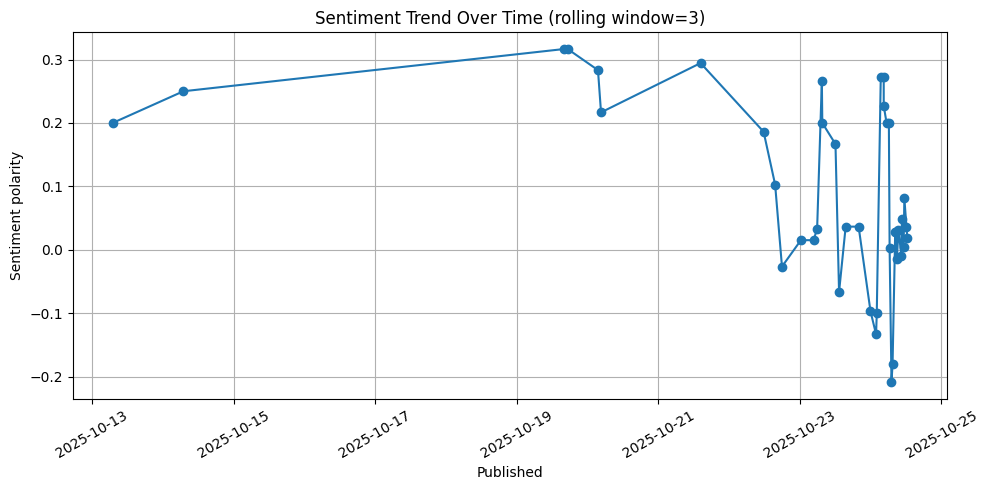

In [48]:
plot_df = content_df.copy()
plot_df = plot_df.sort_values('published')
plot_df['sentiment_rolling'] = plot_df['sentiment'].rolling(window=3,min_periods=1).mean()
fig, ax = plt.subplots()
ax.plot(plot_df['published'], plot_df['sentiment_rolling'], marker='o')
ax.set_title('Sentiment Trend Over Time (rolling window=3)')
ax.set_xlabel('Published')
ax.set_ylabel('Sentiment polarity')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## **5.4 Optional visualization: Stock price (Close) vs time**

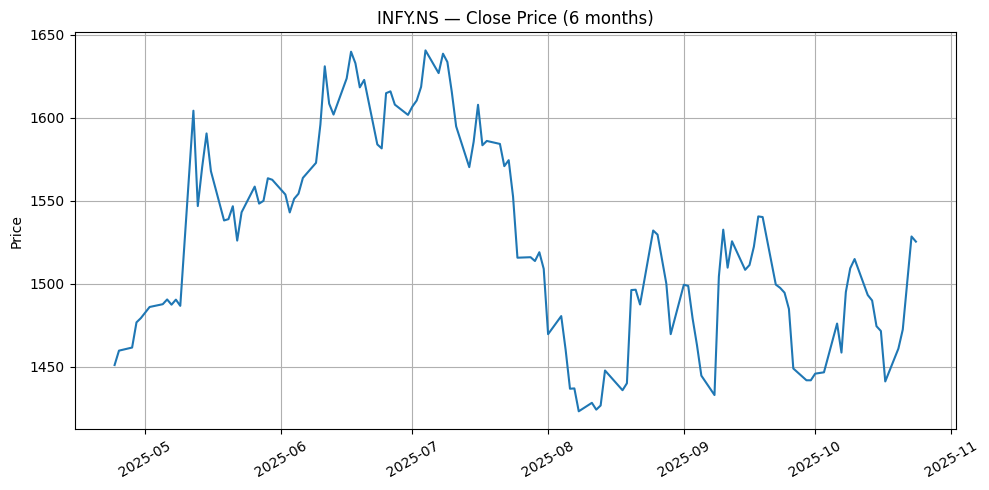

In [49]:
fig, ax = plt.subplots()
ax.plot(hist['Date'], hist['Close'], label='Close Price')
ax.set_title(f'{ticker} — Close Price (6 months)')
ax.set_ylabel('Price')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()